# VASP Xdatcar

Using ``kinisi`` for the analysis of a VASP Xdatcar type file is really straightforward and involves using the ``DiffAnalyzer`` class.

In [16]:
from kinisi.analyze import DiffAnalyzer

There the ``params`` dictionary describes details about the simulation, and matches the options in the [pymatgen.analysis.diffusion_analyzer.DiffusionAnalyzer](https://pymatgen.org/pymatgen.analysis.diffusion_analyzer.html) class.

In [2]:
params = {'specie': 'Li',
          'time_step': 2.0,
          'step_skip': 50,
          'temperature': 400,
          'min_obs': 50}

In [3]:
diff = DiffAnalyzer('example_XDATCAR.gz', params)

100%|██████████| 1000/1000 [02:03<00:00,  8.09it/s]


The ``DiffAnalyzer`` will perform the block-bootstrapping process to obtain the displacements and uncertainties, before using Markov chain Monte Carlo to sample the diffusion coefficient, $D$ (this method is discussed in detail in the [uravu documentation](https://uravu.readthedocs.io/en/latest/mcmc.html)). 
It is possible to then probe the `D` object itself (which is an [``uravu.distribution.Distribution``](https://uravu.readthedocs.io/en/latest/distribution.html#uravu.distribution.Distribution)).

In [4]:
diff.D

Distribution: $D$
Size: 50000
Samples: [6.61e-05 6.55e-05 ... 6.62e-05 6.48e-05]
Median: 6.47e-05
Symetrical Error: 1.07e-06
Confidence intervals: [6.25e-05 6.67e-05]
Confidence interval points: [2.5 97.5]
Reporting Value: (6.47+/-0.11)e-05
Unit: angstrom ** 2 / femtosecond
Normal: True

The ``urauv`` package allows for the easy plotting of relationships and distributions

In [9]:
import matplotlib.pyplot as plt
from uravu.plotting import plot_relationship, plot_distribution

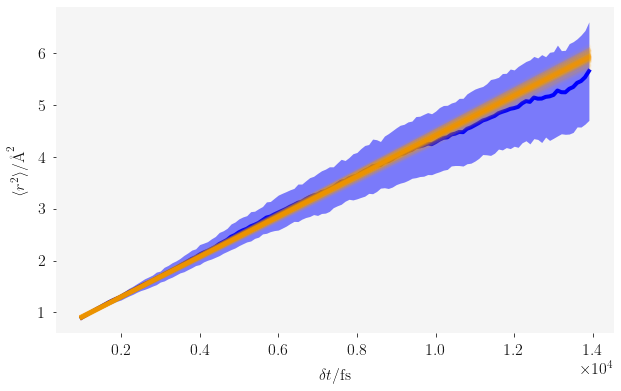

In [12]:
ax = plot_relationship(diff.relationship)
plt.show()

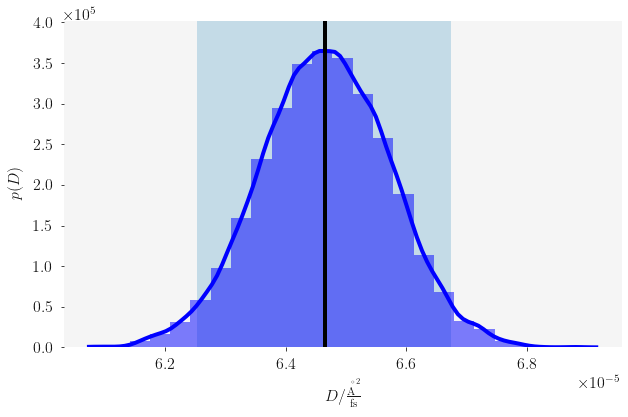

In [15]:
ax = plot_distribution(diff.D)
ax.axvline(diff.D.mean.n, c='k')
plt.show()